In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [84]:
df = pd.read_csv('flats&house_combined.csv')

In [85]:
df['Property_type'].unique()

array(['flat', nan], dtype=object)

In [86]:
df.shape

(3802, 55)

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3802 entries, 0 to 3801
Data columns (total 55 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           3802 non-null   int64  
 1   index                3802 non-null   int64  
 2   Property_type        2942 non-null   object 
 3   property_type        3802 non-null   object 
 4   sector               3802 non-null   object 
 5   society              3801 non-null   object 
 6   price                3785 non-null   float64
 7   area                 3785 non-null   float64
 8   price_per_sqft       3785 non-null   float64
 9   areaWithType         3802 non-null   object 
 10  bedRoom              3802 non-null   int64  
 11  bathroom             3802 non-null   int64  
 12  balcony              3802 non-null   object 
 13  floorNum             3783 non-null   object 
 14  facing               2697 non-null   object 
 15  agePossession        3802 non-null   o

In [88]:
df.duplicated().sum()

0

In [89]:
df.drop_duplicates(inplace=True)

In [90]:
df.head()

,Unnamed: 0,index,Property_type,property_type,sector,society,price,area,price_per_sqft,areaWithType,...,furnishing_type,luxury_score,Green_area,Construction,Management,Amenities,Connectivity,Lifestyle,Environment,Safety
0,0,0,flat,3 BHK,sector 109,ats kocoon,2.20,2195.0,10023.0,Super Built up area 2095(194.63 sq.m.)Built Up...,...,0,156,5.0,5.0,5.0,5.0,4.0,NaN,NaN,NaN
1,1,1,flat,4 BHK,sector 102,conscient heritage max,2.65,2554.0,10375.0,Super Built up area 2554(237.27 sq.m.),...,0,125,5.0,5.0,5.0,5.0,4.5,NaN,NaN,NaN
2,2,2,flat,3 BHK,sector 86,dlf new town heights,1.28,1560.0,8205.0,Super Built up area 1930(179.3 sq.m.)Carpet ar...,...,0,96,5.0,4.5,4.5,5.0,3.0,NaN,NaN,NaN
3,3,3,flat,3 BHK,sector 37c,ild greens,0.90,1603.0,5614.0,Super Built up area 1603(148.92 sq.m.)Built Up...,...,0,66,5.0,5.0,4.5,4.5,4.5,NaN,NaN,NaN
4,4,4,NaN,house,sector 45,independent,8.50,3240.0,26235.0,Plot area 360(301.01 sq.m.),...,1,49,NaN,NaN,NaN,NaN,5.0,4.0,4.5,4.5


### property_type

<Axes: xlabel='property_type'>

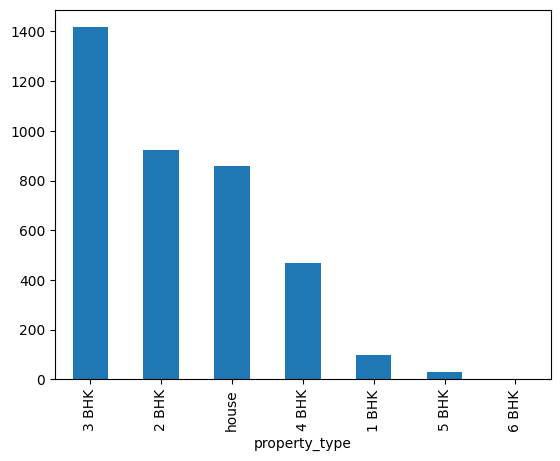

In [91]:
df['property_type'].value_counts().plot(kind='bar')


#### Observations

- Flats are in majority(75 percent) and there are less number of houses(~25 percent)
- No missing values

### society

In [92]:
df['society'].value_counts().shape

(675,)

In [93]:
df['society'].value_counts()

society
independent                                 486
tulip violet                                 75
ss the leaf                                  74
shapoorji pallonji joyville gurugram         45
dlf new town heights                         42
                                           ... 
citizen apartment                             1
huda sector-56 gurgaon                        1
central park resort belgravia residences      1
aardhya homesh                                1
ild grand centra                              1
Name: count, Length: 675, dtype: int64

In [94]:
df[df['society'] != 'independent']['society'].value_counts(normalize=True).cumsum().head(75)

society
tulip violet                            0.022624
ss the leaf                             0.044947
shapoorji pallonji joyville gurugram    0.058522
dlf new town heights                    0.071192
signature global park                   0.082353
                                          ...   
orchid petals                           0.485370
corona optus                            0.489593
dlf the primus                          0.493816
ireo the corridors                      0.497738
ats kocoon                              0.501659
Name: proportion, Length: 75, dtype: float64

In [95]:
society_counts = df['society'].value_counts()

# Frequency distribution for societies
frequency_bins = {
    "Very High (>100)": (society_counts > 100).sum(),
    "High (50-100)": ((society_counts >= 50) & (society_counts <= 100)).sum(),
    "Average (10-49)": ((society_counts >= 10) & (society_counts < 50)).sum(),
    "Low (2-9)": ((society_counts > 1) & (society_counts < 10)).sum(),
    "Very Low (1)": (society_counts == 1).sum()
}
frequency_bins

{'Very High (>100)': 1,
 'High (50-100)': 2,
 'Average (10-49)': 97,
 'Low (2-9)': 285,
 'Very Low (1)': 290}

<Axes: xlabel='society'>

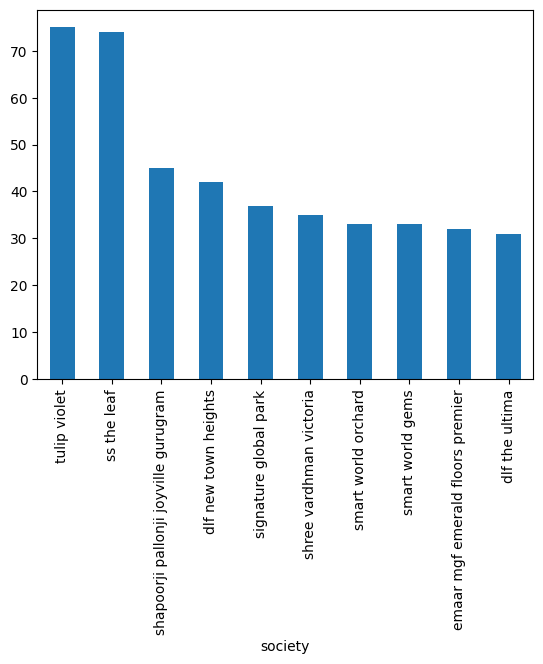

In [96]:
# top 10 socities
df[df['society'] != 'independent']['society'].value_counts().head(10).plot(kind='bar')

In [97]:
df['society'].isnull().sum()

1

In [98]:
df[df['society'].isnull()]

,Unnamed: 0,index,Property_type,property_type,sector,society,price,area,price_per_sqft,areaWithType,...,furnishing_type,luxury_score,Green_area,Construction,Management,Amenities,Connectivity,Lifestyle,Environment,Safety
3313,3313,3313,flat,2 BHK,sector 78,NaN,0.6,1625.0,3692.0,Built Up area: 1625 (150.97 sq.m.),...,0,0,NaN,NaN,NaN,NaN,5.0,4.0,4.0,4.0


#### Observations

- Around 13% properties comes under independent tag.
- There are 675 societies. 
- The top 75 societies have 50 percent of the preperties and the rest 50 percent of the properties come under the remaining 600 societies
    - Very High (>100): Only 1 society has more than 100 listings.
    - High (50-100): 2 societies have between 50 to 100 listings.
    - Average (10-49): 92 societies fall in this range with 10 to 49 listings each.
    - Low (2-9): 273 societies have between 2 to 9 listings.
    - Very Low (1): A significant number, 308 societies, have only 1 listing.
- 1 missing value

### sector

In [99]:
# unique sectors
df['sector'].value_counts().shape

(115,)

<Axes: xlabel='sector'>

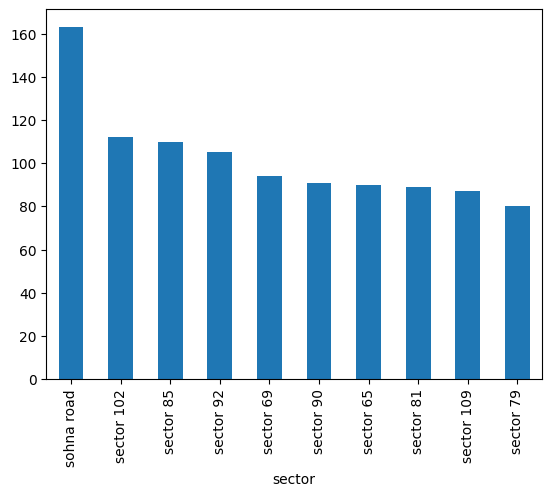

In [100]:
# top 10 sectors
df['sector'].value_counts().head(10).plot(kind='bar')

In [101]:
# Frequency distribution for sectors
sector_counts = df['sector'].value_counts()

sector_frequency_bins = {
    "Very High (>100)": (sector_counts > 100).sum(),
    "High (50-100)": ((sector_counts >= 50) & (sector_counts <= 100)).sum(),
    "Average (10-49)": ((sector_counts >= 10) & (sector_counts < 50)).sum(),
    "Low (2-9)": ((sector_counts > 1) & (sector_counts < 10)).sum(),
    "Very Low (1)": (sector_counts == 1).sum()
}

sector_frequency_bins

{'Very High (>100)': 4,
 'High (50-100)': 25,
 'Average (10-49)': 62,
 'Low (2-9)': 23,
 'Very Low (1)': 1}

#### Observations

- There are a total of 104 unique sectors in the dataset.
- Frequency distribution of sectors:
    - Very High (>100): 3 sectors have more than 100 listings.
    - High (50-100): 25 sectors have between 50 to 100 listings.
    - Average (10-49): A majority, 60 sectors, fall in this range with 10 to 49 listings each.
    - Low (2-9): 16 sectors have between 2 to 9 listings.
    - Very Low (1): Interestingly, there are no sectors with only 1 listing.

### Price

In [102]:
df['price'].isnull().sum()

17

In [103]:
df['price'].describe()

count    3785.000000
mean        2.505804
std         2.950121
min         0.070000
25%         0.940000
50%         1.500000
75%         2.700000
max        31.500000
Name: price, dtype: float64

<Axes: xlabel='price', ylabel='Count'>

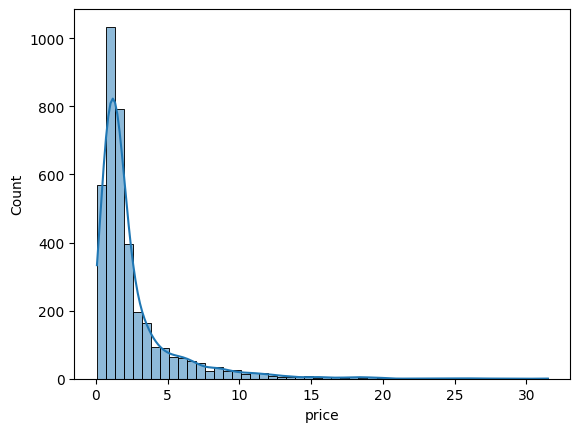

In [104]:
sns.histplot(df['price'], kde=True, bins=50)

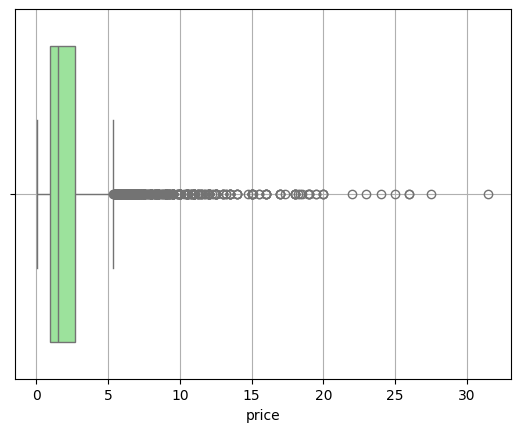

In [105]:
sns.boxplot(x=df['price'], color='lightgreen')
plt.grid()

- Descriptive Statistics:

    - Count: There are 3,660 non-missing price entries.
    - Mean Price: The average price is approximately 2.53 crores.
    - Median Price: The median (or 50th percentile) price is 1.52 crores.
    - Standard Deviation: The prices have a standard deviation of 2.98, indicating variability in the prices.
    - Range: Prices range from a minimum of 0.07 crores to a maximum of 31.5 crores.
    - IQR: The interquartile range (difference between 75th and 25th percentile) is from 0.95 crores to 2.75 crores.


- Visualizations:

    - Distribution: The histogram indicates that most properties are priced in the lower range (below 5 crores), with a few properties going beyond 10 crores.
    - Box Plot: The box plot showcases the spread of the data and potential outliers. Properties priced above approximately 10 crores might be considered outliers as they lie beyond the upper whisker of the box plot.
 

- Missing Values: There are 17 missing values in the price column.

In [106]:
# Skewness and Kurtosis
skewness = df['price'].skew()
kurtosis = df['price'].kurt()

print(skewness,kurtosis)

3.311334654217813 15.257818585808824


**Skewness**: The price distribution has a skewness of approximately 3.28, indicating a positive skew. This means that the distribution tail is skewed to the right, which aligns with our observation from the histogram where most properties have prices on the lower end with a few high-priced properties.

**Kurtosis**: The kurtosis value is approximately 14.93. A kurtosis value greater than 3 indicates a distribution with heavier tails and more outliers compared to a normal distribution.

In [107]:
# Quantile Analysis
quantiles = df['price'].quantile([0.01, 0.05, 0.95, 0.99])

quantiles

0.01     0.250
0.05     0.370
0.95     8.490
0.99    15.016
Name: price, dtype: float64

Quantile Analysis:

- 1% Quantile: Only 1% of properties are priced below 0.25 crores.
- 5% Quantile: 5% of properties are priced below 0.37 crores.
- 95% Quantile: 95% of properties are priced below 8.5 crores.
- 99% Quantile: 99% of properties are priced below 15.26 crores, indicating that very few properties are priced above this value.

In [108]:
# Identify potential outliers using IQR method
Q1 = df['price'].describe()['25%']
Q3 = df['price'].describe()['75%']
IQR = Q3 - Q1

IQR

1.7600000000000002

In [109]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(lower_bound, upper_bound)

-1.7000000000000006 5.340000000000001


In [110]:
outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]
outliers.shape

(432, 55)

In [111]:
outliers['price'].describe()

count    432.000000
mean       9.196157
std        4.061291
min        5.350000
25%        6.400000
50%        8.000000
75%       10.607500
max       31.500000
Name: price, dtype: float64

Outliers Analysis (using IQR method):

- Based on the IQR method, there are 425 properties considered as outliers.
- These outliers have an average price of approximately 9.24 crores.
- The range for these outliers is from 5.46 crores to 31.5 crores.

<Axes: xlabel='price'>

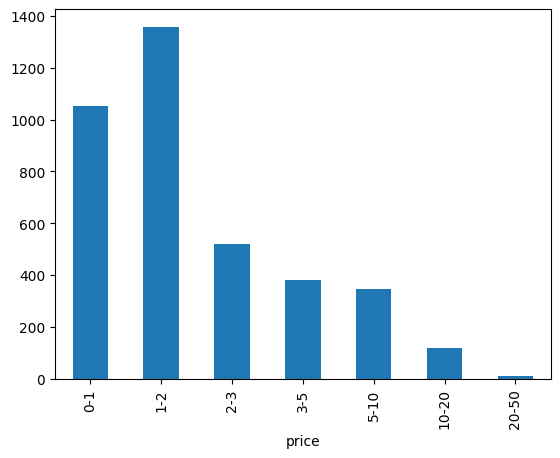

In [112]:
# price binning
bins = [0, 1, 2, 3, 5, 10, 20, 50]
bin_labels = ["0-1", "1-2", "2-3", "3-5", "5-10", "10-20", "20-50"]
pd.cut(df['price'], bins=bins, labels=bin_labels, right=False).value_counts().sort_index().plot(kind='bar')

- The majority of properties are priced in the "1-2 crores" and "2-3 crores" ranges.
- There's a significant drop in the number of properties priced above "5 crores."

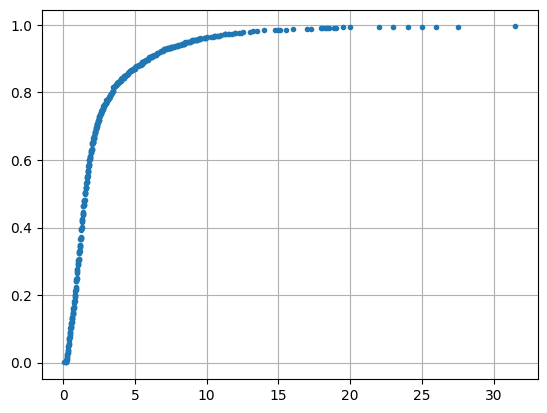

In [113]:
# ecdf plot
ecdf = df['price'].value_counts().sort_index().cumsum() / len(df['price'])
plt.plot(ecdf.index, ecdf, marker='.', linestyle='none')
plt.grid()

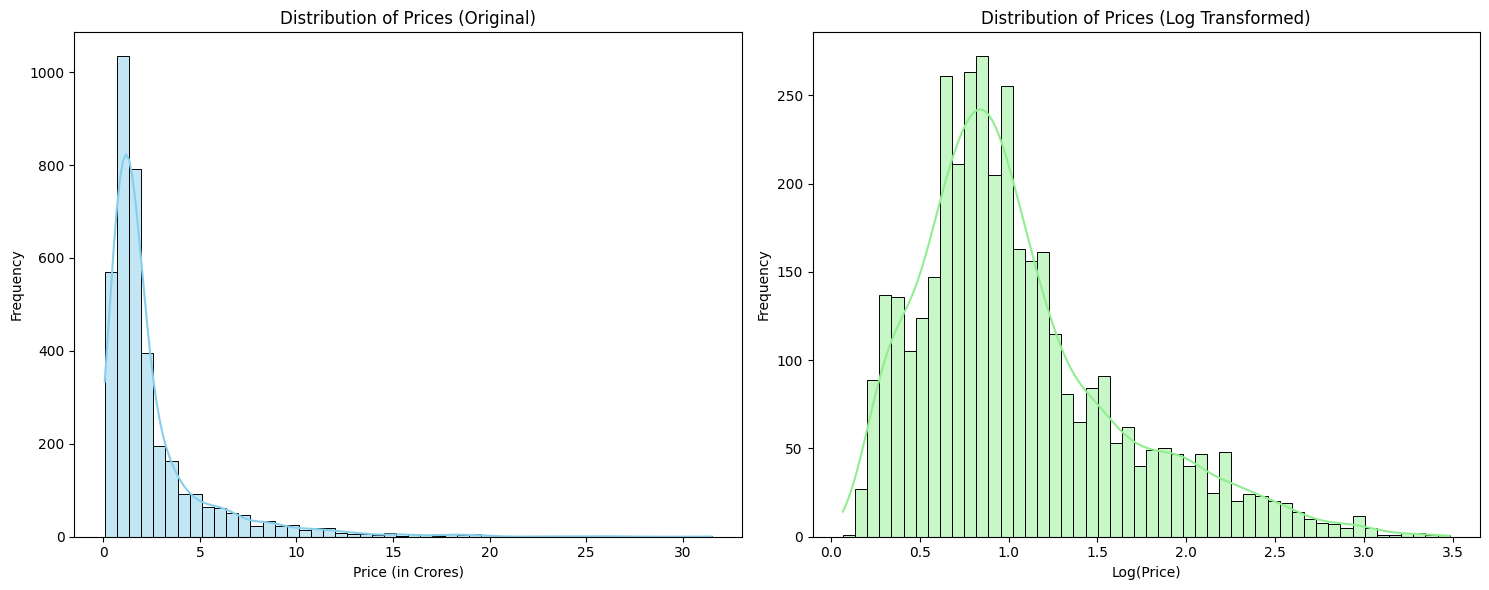

In [114]:
plt.figure(figsize=(15, 6))

# Distribution plot without log transformation
plt.subplot(1, 2, 1)
sns.histplot(df['price'], kde=True, bins=50, color='skyblue')
plt.title('Distribution of Prices (Original)')
plt.xlabel('Price (in Crores)')
plt.ylabel('Frequency')

# Distribution plot with log transformation
plt.subplot(1, 2, 2)
sns.histplot(np.log1p(df['price']), kde=True, bins=50, color='lightgreen')
plt.title('Distribution of Prices (Log Transformed)')
plt.xlabel('Log(Price)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

np.log1p(x): This function computes the natural logarithm of 1+x. 
It's designed to provide more accurate results for values of x that are very close to zero.

Using np.log1p helps in transforming the price column while ensuring that any value (including zero, if present) is handled appropriately. When we need to reverse the transformation, we can use np.expm1 which computes e^x-1

In [115]:
skewness = np.log1p(df['price']).skew()
kurtosis = np.log1p(df['price']).kurt()

print(skewness,kurtosis)

1.0830237140465715 1.006599721590867


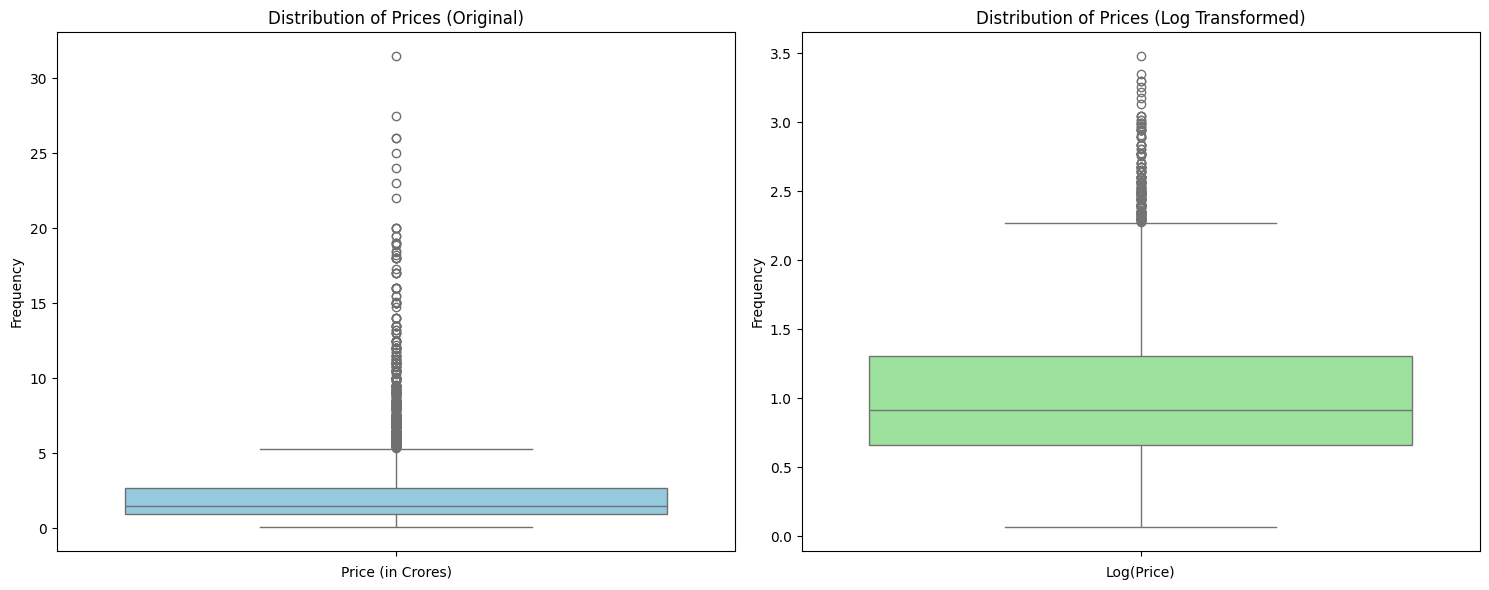

In [116]:
plt.figure(figsize=(15, 6))

# Distribution plot without log transformation
plt.subplot(1, 2, 1)
sns.boxplot(df['price'], color='skyblue')
plt.title('Distribution of Prices (Original)')
plt.xlabel('Price (in Crores)')
plt.ylabel('Frequency')

# Distribution plot with log transformation
plt.subplot(1, 2, 2)
sns.boxplot(np.log1p(df['price']), color='lightgreen')
plt.title('Distribution of Prices (Log Transformed)')
plt.xlabel('Log(Price)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### price_per_sqft

In [117]:
df['price_per_sqft'].isnull().sum()

17

In [118]:
df['price_per_sqft'].describe()

count      3785.000000
mean      13800.167768
std       23052.005585
min           4.000000
25%        6808.000000
50%        9000.000000
75%       13765.000000
max      600000.000000
Name: price_per_sqft, dtype: float64

<Axes: xlabel='price_per_sqft', ylabel='Count'>

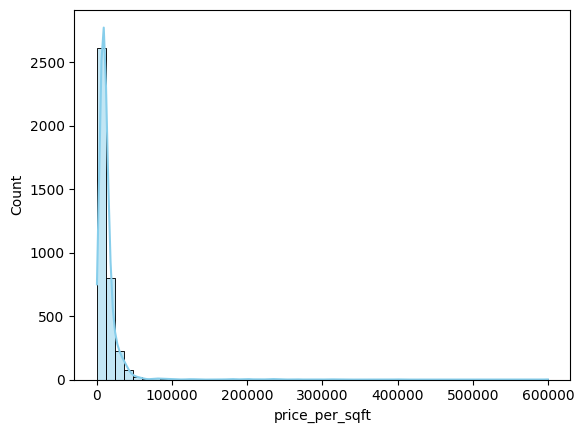

In [119]:
sns.histplot(df['price_per_sqft'], bins=50, color='skyblue', kde=True)

Most properties have a price_per_sqft ranging between approximately ₹0 and ₹40,000. There is a significant concentration in the lower range, with a few properties having exceptionally high price_per_sqft.

<Axes: ylabel='price_per_sqft'>

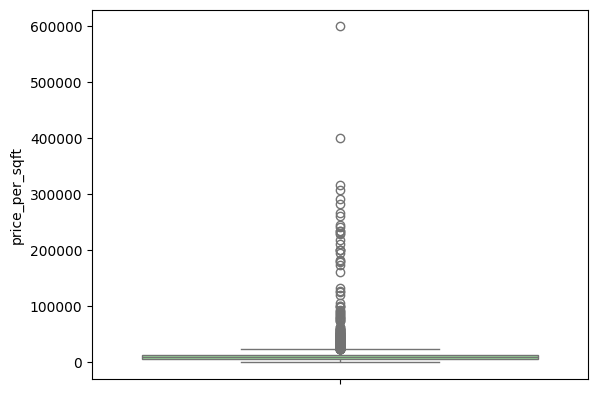

In [120]:
sns.boxplot(df['price_per_sqft'], color='lightgreen')

The box plot clearly shows several outliers, especially on the higher side. The interquartile range (IQR) is relatively compact, but there are many data points beyond the "whiskers" of the box plot, indicating potential outliers

#### Observations

- Potential Outliers
- Right Skewed
- 17 missing values

### bedRoom

In [121]:
df['bedRoom'].isnull().sum()

0

<Axes: xlabel='bedRoom'>

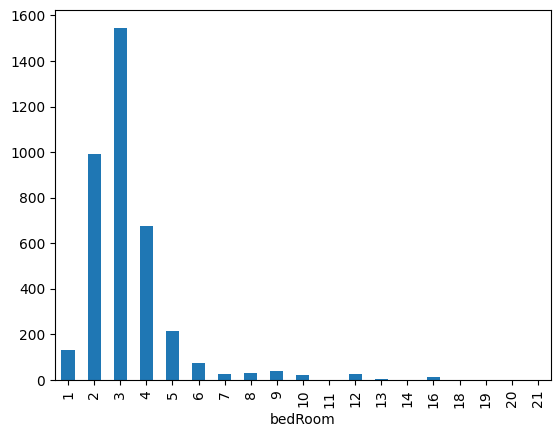

In [122]:
df['bedRoom'].value_counts().sort_index().plot(kind='bar')

<Axes: ylabel='proportion'>

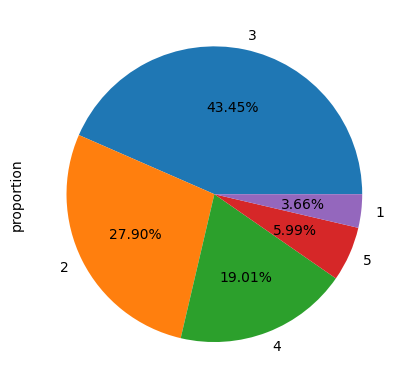

In [123]:
df['bedRoom'].value_counts(normalize=True).head().plot(kind='pie',autopct='%0.2f%%')

### bathroom

In [124]:
df['bathroom'].isnull().sum()

0

<Axes: xlabel='bathroom'>

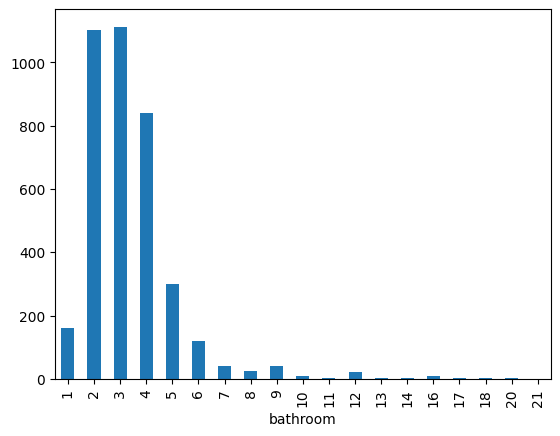

In [125]:
df['bathroom'].value_counts().sort_index().plot(kind='bar')

<Axes: ylabel='proportion'>

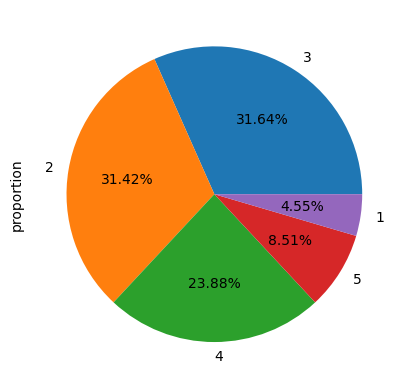

In [126]:
df['bathroom'].value_counts(normalize=True).head().plot(kind='pie',autopct='%0.2f%%')

In [127]:
df.head()

,Unnamed: 0,index,Property_type,property_type,sector,society,price,area,price_per_sqft,areaWithType,...,furnishing_type,luxury_score,Green_area,Construction,Management,Amenities,Connectivity,Lifestyle,Environment,Safety
0,0,0,flat,3 BHK,sector 109,ats kocoon,2.20,2195.0,10023.0,Super Built up area 2095(194.63 sq.m.)Built Up...,...,0,156,5.0,5.0,5.0,5.0,4.0,NaN,NaN,NaN
1,1,1,flat,4 BHK,sector 102,conscient heritage max,2.65,2554.0,10375.0,Super Built up area 2554(237.27 sq.m.),...,0,125,5.0,5.0,5.0,5.0,4.5,NaN,NaN,NaN
2,2,2,flat,3 BHK,sector 86,dlf new town heights,1.28,1560.0,8205.0,Super Built up area 1930(179.3 sq.m.)Carpet ar...,...,0,96,5.0,4.5,4.5,5.0,3.0,NaN,NaN,NaN
3,3,3,flat,3 BHK,sector 37c,ild greens,0.90,1603.0,5614.0,Super Built up area 1603(148.92 sq.m.)Built Up...,...,0,66,5.0,5.0,4.5,4.5,4.5,NaN,NaN,NaN
4,4,4,NaN,house,sector 45,independent,8.50,3240.0,26235.0,Plot area 360(301.01 sq.m.),...,1,49,NaN,NaN,NaN,NaN,5.0,4.0,4.5,4.5


### balcony

In [128]:
df['balcony'].isnull().sum()

0

<Axes: xlabel='balcony'>

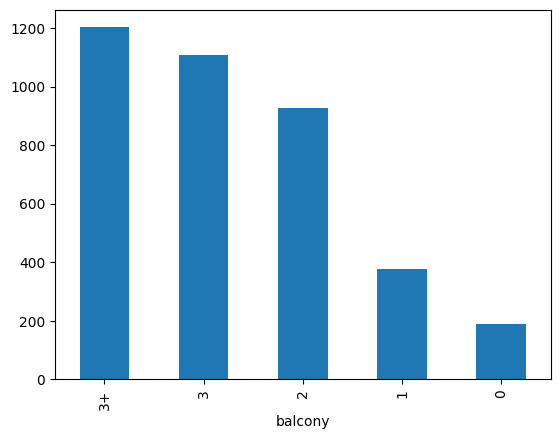

In [129]:
df['balcony'].value_counts().plot(kind='bar')

<Axes: ylabel='proportion'>

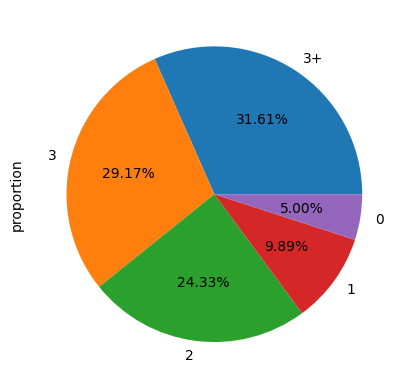

In [130]:
df['balcony'].value_counts(normalize=True).head().plot(kind='pie',autopct='%0.2f%%')

In [131]:
### floorNum

In [132]:
df.iloc[:,10:].head()

,bedRoom,bathroom,balcony,floorNum,facing,agePossession,rating,floor_Num,total_floors,super_built_up_area,...,furnishing_type,luxury_score,Green_area,Construction,Management,Amenities,Connectivity,Lifestyle,Environment,Safety
0,3,4,3,8th of 24 Floors,North-East,Relatively New,[Green Area5 out of 5 Construction5 out of 5 M...,8.0,24.0,2095.0,...,0,156,5.0,5.0,5.0,5.0,4.0,NaN,NaN,NaN
1,4,5,3+,17th of 25 Floors,North,Moderately Old,[Green Area5 out of 5 Construction5 out of 5 M...,17.0,25.0,2554.0,...,0,125,5.0,5.0,5.0,5.0,4.5,NaN,NaN,NaN
2,3,4,3+,12nd of 22 Floors,West,Moderately Old,[Green Area5 out of 5 Construction4.5 out of 5...,12.0,22.0,1930.0,...,0,96,5.0,4.5,4.5,5.0,3.0,NaN,NaN,NaN
3,3,3,3,Ground of 19 Floors,North-East,Under Construction,[Green Area5 out of 5 Construction5 out of 5 M...,0.0,19.0,1603.0,...,0,66,5.0,5.0,4.5,4.5,4.5,NaN,NaN,NaN
4,5,4,2,1.0,North-East,Moderately Old,[Environment4.5 out of 5 Lifestyle4 out of 5 C...,NaN,NaN,NaN,...,1,49,NaN,NaN,NaN,NaN,5.0,4.0,4.5,4.5


In [133]:
df['floorNum'].isnull().sum()

19

In [134]:
df['floorNum'].describe()

count     3783
unique     568
top        3.0
freq       273
Name: floorNum, dtype: object

<Axes: xlabel='floorNum'>

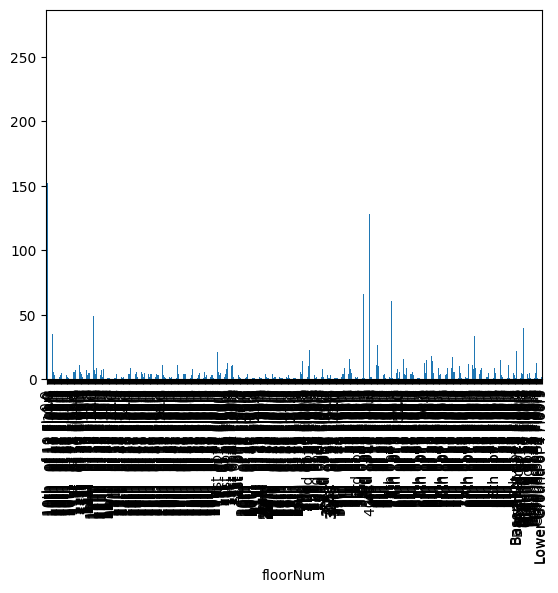

In [135]:
df['floorNum'].value_counts().sort_index().plot(kind='bar')

<Axes: ylabel='floorNum'>

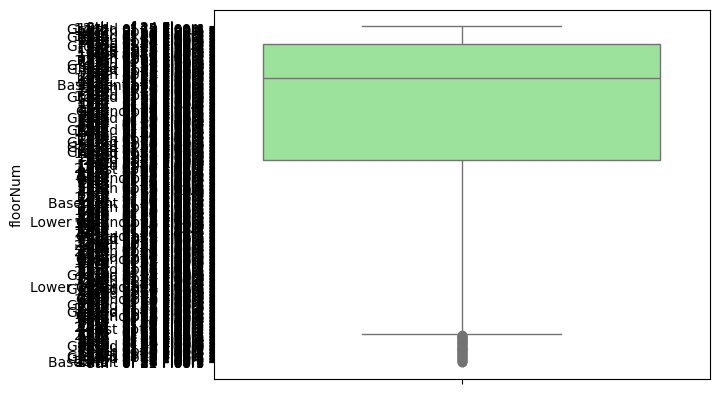

In [136]:
sns.boxplot(df['floorNum'], color='lightgreen')

- The majority of the properties lie between the ground floor (0) and the 25th floor.
- Floors 1 to 4 are particularly common, with the 3rd floor being the most frequent.
- There are a few properties located at higher floors, but their frequency is much lower.
- The box plot reveals that the majority of the properties are concentrated around the lower floors. The interquartile range (IQR) lies between approximately the 2nd and 10th floors.
- Data points beyond the "whiskers" of the box plot, especially on the higher side, indicate potential outliers.

### facing

In [137]:
df['facing'].isnull().sum()

1105

In [138]:
df['facing'].fillna('NA',inplace=True)

In [139]:
df['facing'].value_counts()

facing
NA            1105
East           641
North-East     639
North          398
West           255
South          233
North-West     200
South-East     174
South-West     157
Name: count, dtype: int64

### agePossession

In [140]:
df['agePossession'].isnull().sum()

0

In [141]:
df['agePossession'].value_counts()

agePossession
Relatively New        1676
undefined              580
Moderately Old         575
New Property           530
Old Property           310
Under Construction     131
Name: count, dtype: int64

### areas

In [142]:
# super built up area
df['super_built_up_area'].isnull().sum()

1887

In [143]:
df['super_built_up_area'].describe()

count     1915.000000
mean      1921.658251
std        767.160169
min         89.000000
25%       1457.000000
50%       1828.000000
75%       2215.000000
max      10000.000000
Name: super_built_up_area, dtype: float64

<Axes: xlabel='super_built_up_area', ylabel='Count'>

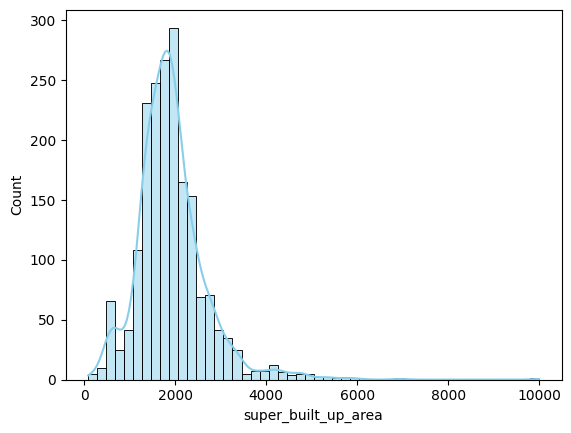

In [144]:
sns.histplot(df['super_built_up_area'].dropna(), bins=50, color='skyblue', kde=True)

<Axes: ylabel='super_built_up_area'>

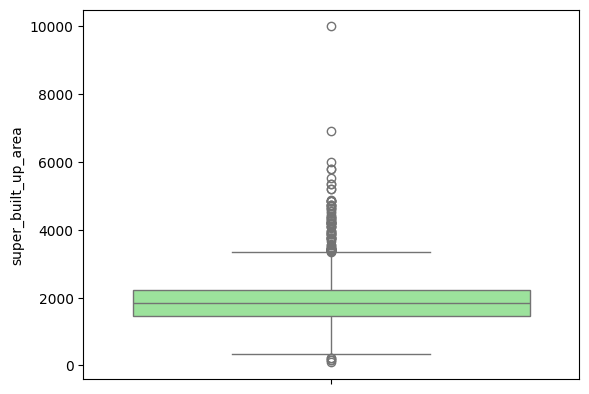

In [145]:
sns.boxplot(df['super_built_up_area'].dropna(), color='lightgreen')

- Most properties have a super built-up area ranging between approximately 1,000 sq.ft and 2,500 sq.ft.
- There are a few properties with a significantly larger area, leading to a right-skewed distribution.
- The interquartile range (IQR) lies between roughly 1,480 sq.ft and 2,215 sq.ft, indicating that the middle 50% of the properties fall within this range.
- There are several data points beyond the upper "whisker" of the box plot, indicating potential outliers. These are properties with an unusually large super built-up area.

In [146]:
# built up area
df['Built_up_area'].isnull().sum()

2615

In [147]:
df['Built_up_area'].describe()

count      1187.000000
mean       2405.257035
std       21382.168669
min          30.000000
25%        1122.500000
50%        1600.000000
75%        2060.000000
max      737147.000000
Name: Built_up_area, dtype: float64

<Axes: xlabel='Built_up_area', ylabel='Count'>

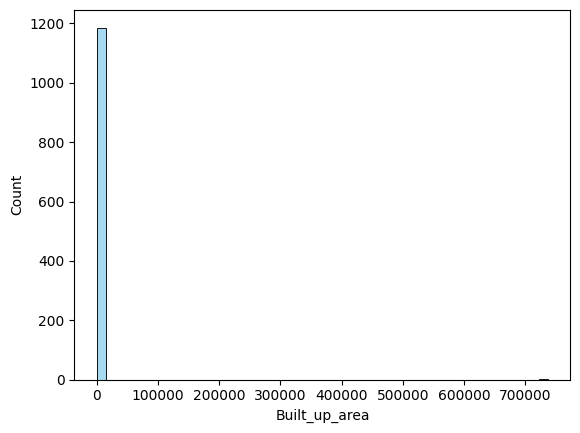

In [148]:
sns.histplot(df['Built_up_area'].dropna(), bins=50, color='skyblue', kde=False)

<Axes: ylabel='Built_up_area'>

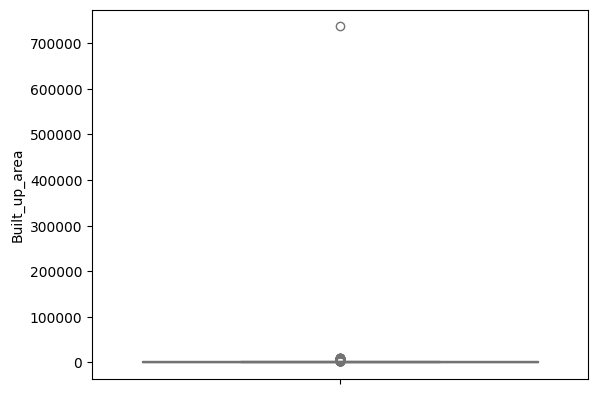

In [149]:
sns.boxplot(df['Built_up_area'].dropna(), color='lightgreen')

- Most properties have a built-up area ranging roughly between 500 sq.ft and 3,500 sq.ft.
- There are very few properties with a much larger built-up area, leading to a highly right-skewed distribution.
- The box plot confirms the presence of significant outliers on the higher side. The data's interquartile range (IQR) is relatively compact, but the "whiskers" of the box plot are stretched due to the outliers.


The presence of extreme values, especially on the higher side, suggests that there may be outliers or data errors. This could also be due to some properties being exceptionally large, like a commercial complex or an entire building being listed.

In [150]:
# carpet area
df['carpet_area'].isnull().sum()

1859

In [151]:
df['carpet_area'].describe()

count      1943.000000
mean       2484.448243
std       22380.957584
min          15.000000
25%         824.000000
50%        1294.000000
75%        1787.500000
max      607936.000000
Name: carpet_area, dtype: float64

<Axes: xlabel='carpet_area', ylabel='Count'>

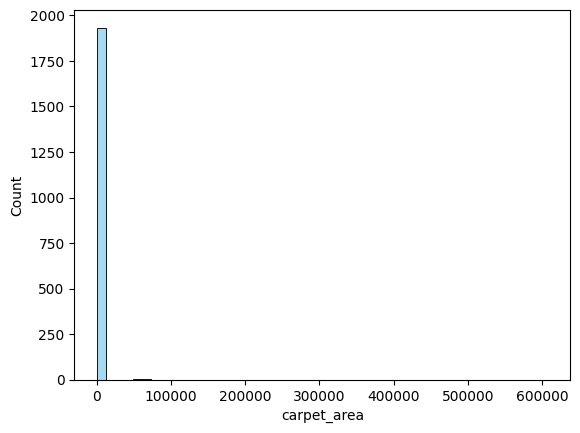

In [152]:
sns.histplot(df['carpet_area'].dropna(), bins=50, color='skyblue', kde=False)

<Axes: ylabel='carpet_area'>

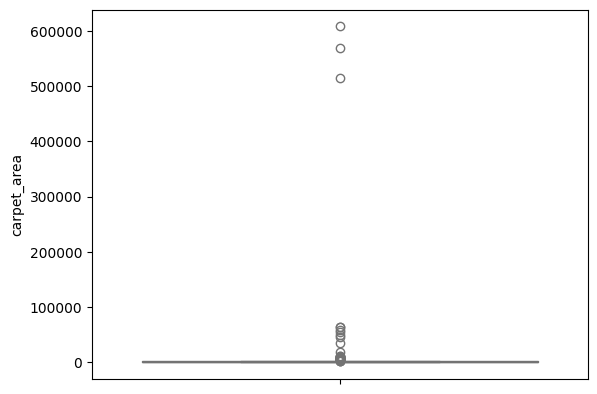

In [153]:
sns.boxplot(df['carpet_area'].dropna(), color='lightgreen')

In [154]:
df.iloc[:,16:]

,rating,floor_Num,total_floors,super_built_up_area,carpet_area,Built_up_area,study room,servant room,store room,pooja room,...,furnishing_type,luxury_score,Green_area,Construction,Management,Amenities,Connectivity,Lifestyle,Environment,Safety
0,[Green Area5 out of 5 Construction5 out of 5 M...,8.0,24.0,2095.00,NaN,1860.00,0,1,0,0,...,0,156,5.0,5.0,5.0,5.0,4.0,NaN,NaN,NaN
1,[Green Area5 out of 5 Construction5 out of 5 M...,17.0,25.0,2554.00,NaN,NaN,0,1,0,0,...,0,125,5.0,5.0,5.0,5.0,4.5,NaN,NaN,NaN
2,[Green Area5 out of 5 Construction4.5 out of 5...,12.0,22.0,1930.00,1560.0,NaN,0,1,0,1,...,0,96,5.0,4.5,4.5,5.0,3.0,NaN,NaN,NaN
3,[Green Area5 out of 5 Construction5 out of 5 M...,0.0,19.0,1603.00,NaN,1500.00,0,0,0,0,...,0,66,5.0,5.0,4.5,4.5,4.5,NaN,NaN,NaN
4,[Environment4.5 out of 5 Lifestyle4 out of 5 C...,NaN,NaN,NaN,NaN,NaN,0,1,0,1,...,1,49,NaN,NaN,NaN,NaN,5.0,4.0,4.5,4.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3797,[Environment4 out of 5 Lifestyle4 out of 5 Con...,NaN,NaN,NaN,NaN,NaN,1,0,0,1,...,1,19,NaN,NaN,NaN,NaN,5.0,4.0,4.0,4.0
3798,[Green Area5 out of 5 Construction4 out of 5 M...,11.0,17.0,2251.42,NaN,1750.75,0,1,0,1,...,1,140,5.0,4.0,4.0,5.0,4.0,NaN,NaN,NaN
3799,[Management4 out of 5 Green Area5 out of 5 Con...,11.0,18.0,2630.00,NaN,NaN,0,1,0,1,...,0,64,5.0,4.0,4.0,5.0,5.0,NaN,NaN,NaN
3800,[Green Area4 out of 5 Construction5 out of 5 M...,10.0,26.0,1215.00,NaN,NaN,0,0,0,0,...,0,108,4.0,5.0,4.0,5.0,4.0,NaN,NaN,NaN


### additional rooms

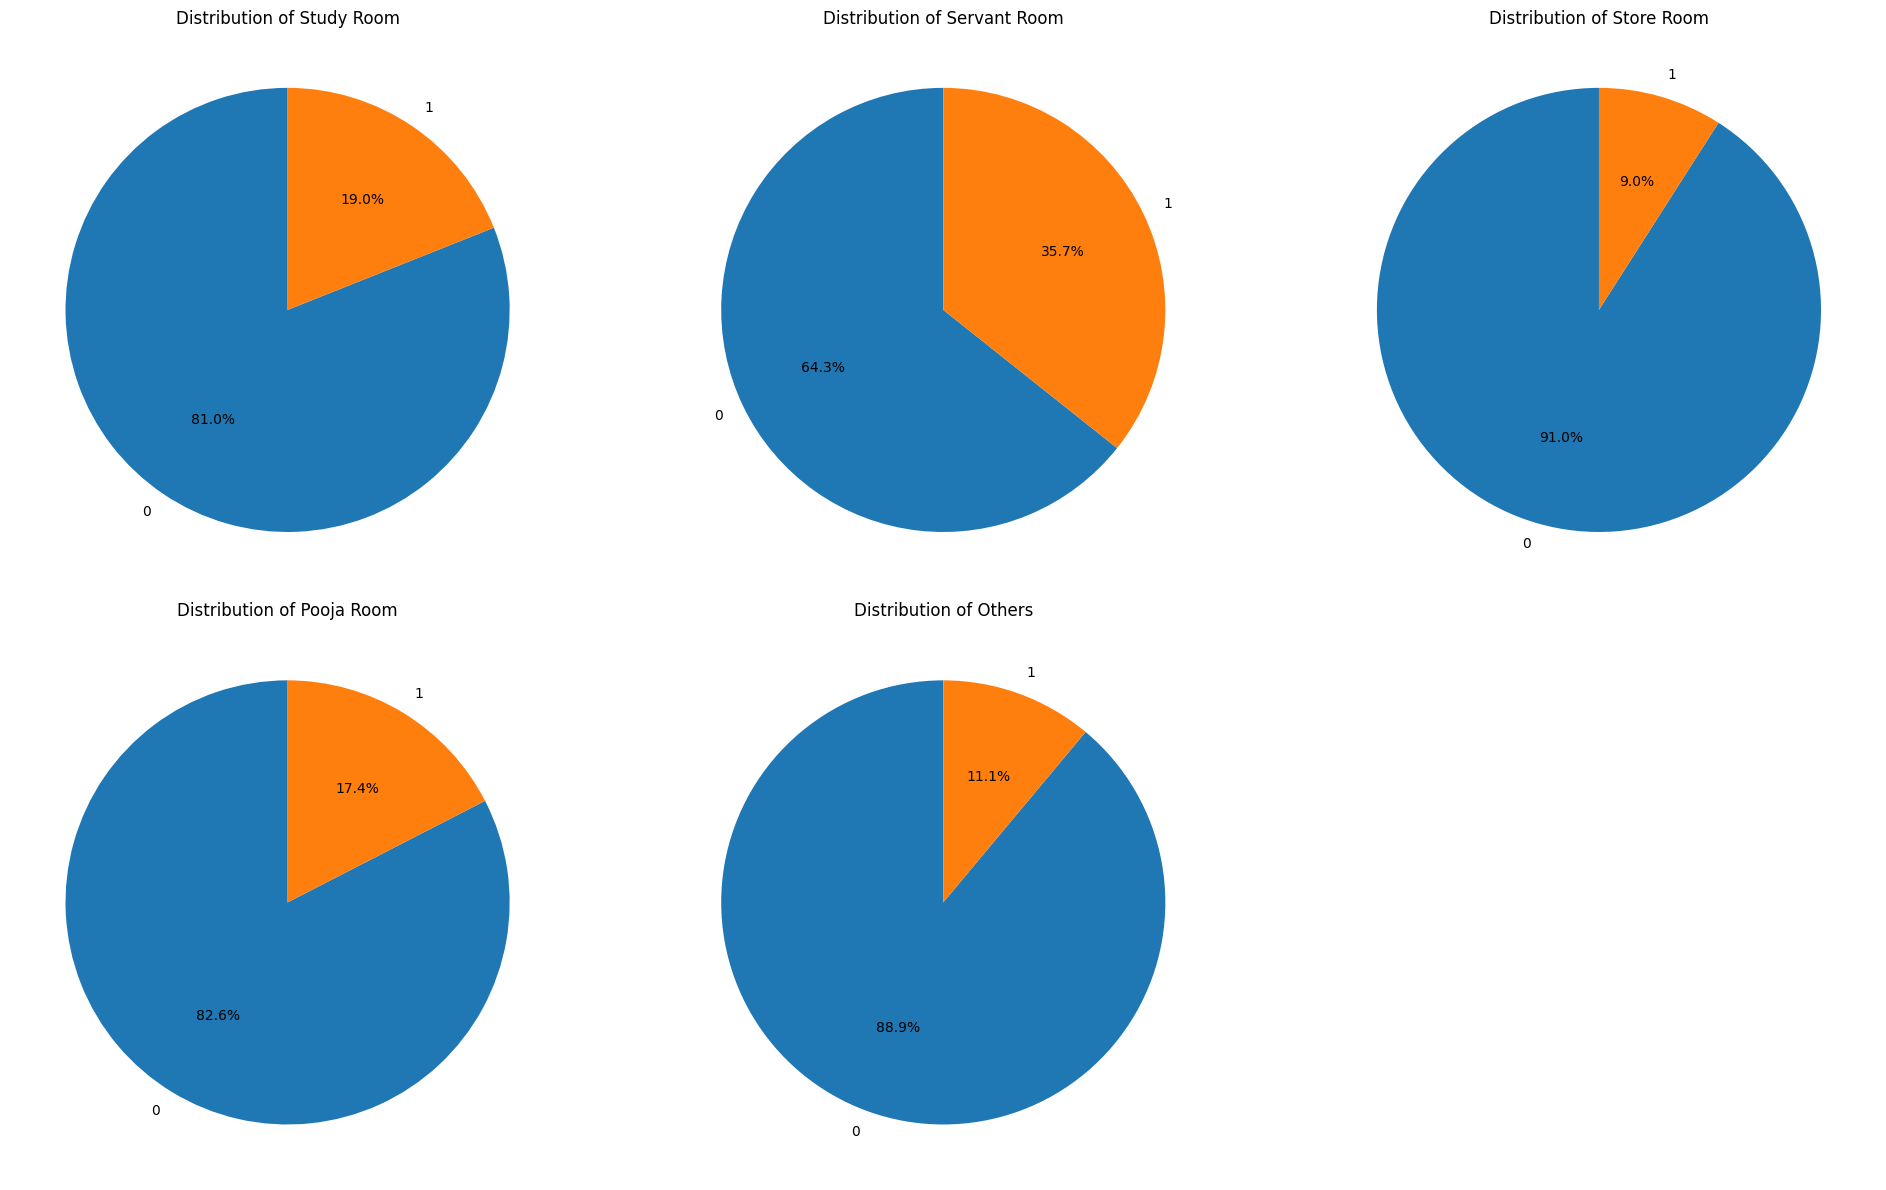

In [155]:
plt.figure(figsize=(20, 12))

# Create a subplot of pie charts for each room type
for idx, room in enumerate(['study room','servant room','store room','pooja room','others'], 1):
    ax = plt.subplot(2, 3, idx)
    df[room].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, ax=ax)
    plt.title(f'Distribution of {room.title()}')
    plt.ylabel('')

plt.tight_layout()
plt.show()

### furnishing_type

In [156]:
df['furnishing_type'].value_counts()

furnishing_type
0    2508
1    1074
2     220
Name: count, dtype: int64

<Axes: ylabel='count'>

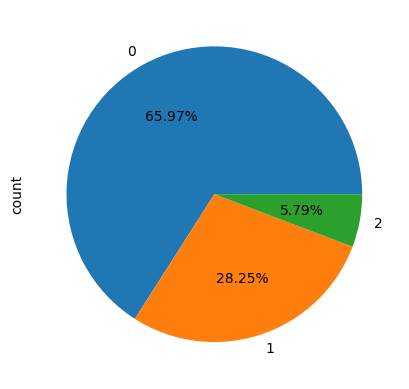

In [157]:
df['furnishing_type'].value_counts().plot(kind='pie',autopct='%0.2f%%')

### luxury score

In [158]:
df['luxury_score'].isnull().sum()

0

In [159]:
df['luxury_score'].describe()

count    3802.000000
mean       70.935560
std        52.827964
min         0.000000
25%        31.000000
50%        58.000000
75%       109.000000
max       174.000000
Name: luxury_score, dtype: float64

<Axes: xlabel='luxury_score', ylabel='Count'>

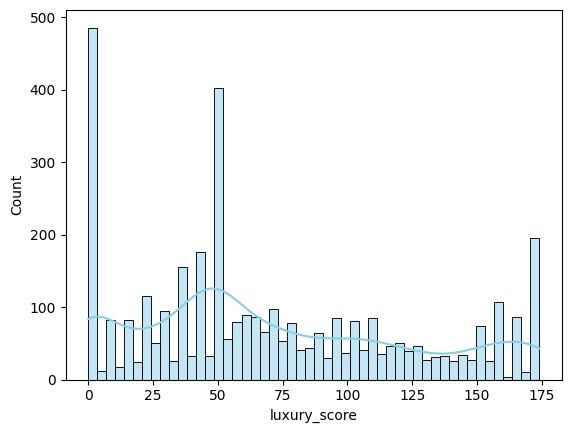

In [160]:
sns.histplot(df['luxury_score'], bins=50, color='skyblue', kde=True)

<Axes: ylabel='luxury_score'>

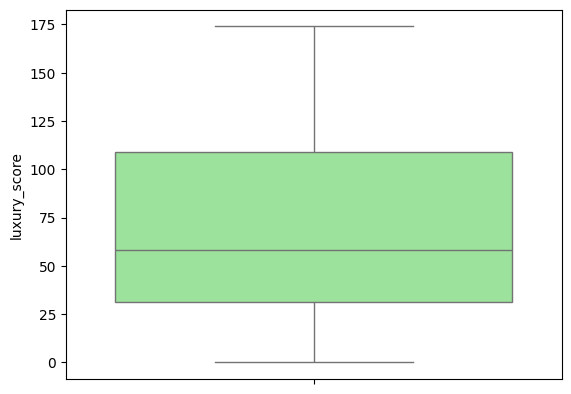

In [161]:
sns.boxplot(df['luxury_score'], color='lightgreen')

The luxury score distribution has multiple peaks, suggesting a multi-modal distribution. There's a significant number of properties with lower luxury scores (around 0-50), and another peak is observed around the 110-130 range.

The box plot reveals that the majority of the properties have luxury scores between approximately 30 and 110. The interquartile range (IQR) lies between these values.

In [162]:
df.head()

,Unnamed: 0,index,Property_type,property_type,sector,society,price,area,price_per_sqft,areaWithType,...,furnishing_type,luxury_score,Green_area,Construction,Management,Amenities,Connectivity,Lifestyle,Environment,Safety
0,0,0,flat,3 BHK,sector 109,ats kocoon,2.20,2195.0,10023.0,Super Built up area 2095(194.63 sq.m.)Built Up...,...,0,156,5.0,5.0,5.0,5.0,4.0,NaN,NaN,NaN
1,1,1,flat,4 BHK,sector 102,conscient heritage max,2.65,2554.0,10375.0,Super Built up area 2554(237.27 sq.m.),...,0,125,5.0,5.0,5.0,5.0,4.5,NaN,NaN,NaN
2,2,2,flat,3 BHK,sector 86,dlf new town heights,1.28,1560.0,8205.0,Super Built up area 1930(179.3 sq.m.)Carpet ar...,...,0,96,5.0,4.5,4.5,5.0,3.0,NaN,NaN,NaN
3,3,3,flat,3 BHK,sector 37c,ild greens,0.90,1603.0,5614.0,Super Built up area 1603(148.92 sq.m.)Built Up...,...,0,66,5.0,5.0,4.5,4.5,4.5,NaN,NaN,NaN
4,4,4,NaN,house,sector 45,independent,8.50,3240.0,26235.0,Plot area 360(301.01 sq.m.),...,1,49,NaN,NaN,NaN,NaN,5.0,4.0,4.5,4.5
